Python Version :  3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
Scikit-Learn Version :  0.24.2
Dataset size :  (250, 2) (250,)
Cluster names :  {0, 1, 2, 3, 4}
Accuracy : 0.000
Confusion Matrix : 
 [[ 0  0  0 50  0]
 [50  0  0  0  0]
 [ 0  0  0  0 50]
 [ 0 50  0  0  0]
 [ 0  1 49  0  0]]
Adjusted Accuracy : 0.990
Cluster Centers : 
 [[-6.371 -5.977]
 [ 9.377  3.18 ]
 [ 4.823  3.094]
 [ 8.518 -3.628]
 [ 1.242  1.833]]
Sum of squared distances of samples to their closest cluster center : 248.35
Distortions (Sum Of Squared Distance of Samples from Closest Cluster Center) :  [12055.71905661459, 3906.8061851402153, 1793.803168498912, 590.1132702466161, 248.34535672978487, 227.81634890961402, 209.57964770487936, 191.64856743296275, 172.54394294094655, 156.20482810921646]


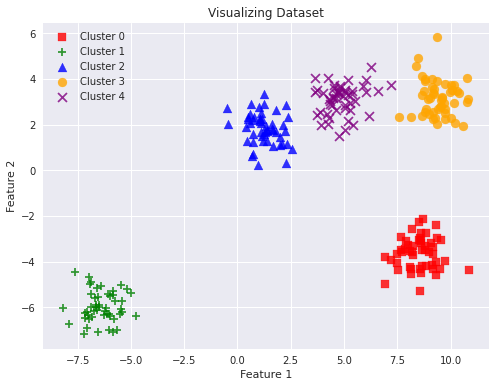

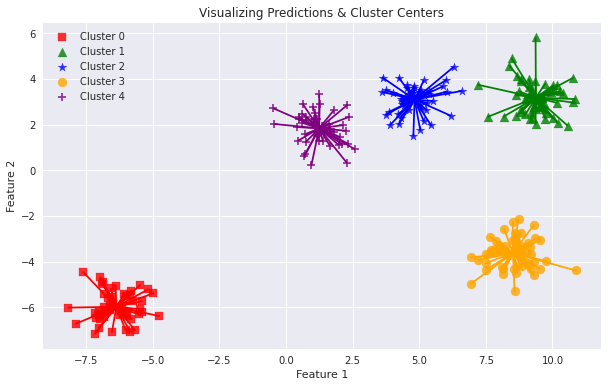

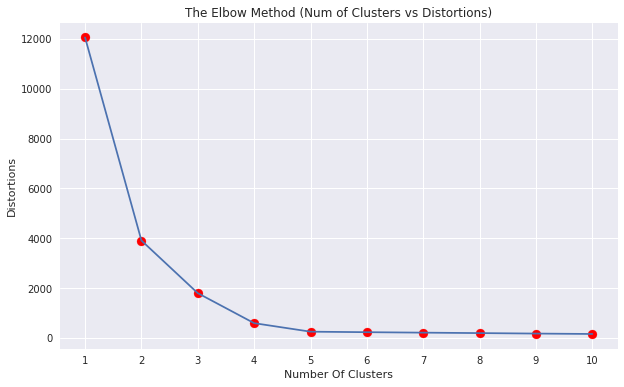

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn import cluster, datasets

import warnings
import sys

print("Python Version : ",sys.version)
print("Scikit-Learn Version : ",sklearn.__version__)

warnings.filterwarnings('ignore') ## We'll silent future warnings using this command.
np.set_printoptions(precision=3)

## Beow magic function fits plot inside of current notebook. 
## There is another option to it (%matplotlib notebook) which opens plot in new notebook.
# %matplotlib inline

# We'll create a dataset with 250 samples, 2 features and 5 cluster centers using scikit-learn's make_blobs method.

samples, clusters = datasets.make_blobs(n_samples=250, n_features=2, centers=5, cluster_std=0.7, random_state=12345)
print('Dataset size : ', samples.shape, clusters.shape)
print('Cluster names : ',set(clusters))

# We'll be visualizing the dataset by plotting scatter chart of Feature-1 and Feature-2. We'll also color-encode and marker-encode each of cluster to show them different.

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    for i, c, m in zip(range(5),['red','green','blue','orange','purple'], ['s','+','^','o', 'x']):
        plt.scatter(samples[clusters == i,0],samples[clusters == i,1], color=c, marker=m, s=80, alpha = 0.8, label= 'Cluster %d'%i)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Visualizing Dataset')
    plt.legend(loc='best');

#We are initializing KMeans clustering algorithms below with n_clusters=5 because we already know a number of clusters beforehand. For cases where we don't know a number of clusters upfront, we have explained the elbow method below to find out the proper number of clusters.

kmeans = cluster.KMeans(n_clusters=5)
kmeans.fit(samples)
preds = kmeans.predict(samples)

#We are printing below the accuracy and confusion matrix. We can notice from the confusion matrix that classes returned by kmeans is different from actual classes hence we are getting low accuracy. We need to use the adjusted_rand_score method to handle such scenarios.

from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score

print('Accuracy : %.3f'%accuracy_score(y_true = clusters, y_pred=preds))
print('Confusion Matrix : \n', confusion_matrix(y_true=clusters, y_pred=preds))
print('Adjusted Accuracy : %.3f'%adjusted_rand_score(labels_true=clusters, labels_pred=preds))

#We can also access cluster center for each cluster using cluster_centers_ attribute of KMeans object.

print('Cluster Centers : \n', str(kmeans.cluster_centers_))

#We can also access sum of squared distance of each sample from their closest cluster center using intertia_ attribute of KMeans object. It should be as minimum as possible.

print('Sum of squared distances of samples to their closest cluster center : %.2f'%kmeans.inertia_,)

#Below we are plotting all points of sample data and also linking them to their cluster center using line plot.

with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(10,6))

    plt.scatter(samples[preds == 0,0],samples[preds == 0,1], color='red', marker='s', s=80, alpha = 0.8, label= 'Cluster 0')
    plt.scatter(samples[preds == 1,0],samples[preds == 1,1], color='green', marker='^', s=80, alpha = 0.8, label= 'Cluster 1')
    plt.scatter(samples[preds == 2,0],samples[preds == 2,1], color='blue', marker='*', s=80, alpha = 0.8, label= 'Cluster 2')
    plt.scatter(samples[preds == 3,0],samples[preds == 3,1], color='orange', marker='o', s=80, alpha = 0.8, label= 'Cluster 3')
    plt.scatter(samples[preds == 4,0],samples[preds == 4,1], color='purple', marker='+', s=80, alpha = 0.8, label= 'Cluster 4')

    for x,y in zip(samples[preds == 0,0],samples[preds == 0,1]):
        plt.plot([kmeans.cluster_centers_[0][0],x],[kmeans.cluster_centers_[0][1],y], color='red')
    for x,y in zip(samples[preds == 1,0],samples[preds == 1,1]):
        plt.plot([kmeans.cluster_centers_[1][0],x],[kmeans.cluster_centers_[1][1],y], color='green')
    for x,y in zip(samples[preds == 2,0],samples[preds == 2,1]):
        plt.plot([kmeans.cluster_centers_[2][0],x],[kmeans.cluster_centers_[2][1],y], color='blue')
    for x,y in zip(samples[preds == 3,0],samples[preds == 3,1]):
        plt.plot([kmeans.cluster_centers_[3][0],x],[kmeans.cluster_centers_[3][1],y], color='orange')
    for x,y in zip(samples[preds == 4,0],samples[preds == 4,1]):
        plt.plot([kmeans.cluster_centers_[4][0],x],[kmeans.cluster_centers_[4][1],y], color='purple')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Visualizing Predictions & Cluster Centers')
    plt.legend(loc='best');


#Here we look at cluster dispersion for different values of k and plot it. Once plotted we take k value which is at "pit of the elbow" to be a number of clusters. It's based on the intuition that after that many clusters adding more clusters is not improving the sum of squared distances of samples from their clusters further hence that's the best number of clusters one should try.

plt.figure(figsize=(10,6))
distortions = []
for i in range(1,11):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(samples)
    distortions.append(kmeans.inertia_)

print('Distortions (Sum Of Squared Distance of Samples from Closest Cluster Center) : ',distortions)

with plt.style.context(('ggplot', 'seaborn')):
    plt.plot(range(1,11), distortions, )
    plt.scatter(range(1,11), distortions, color='red', marker='o', s=80)
    plt.xlabel('Number Of Clusters')
    plt.ylabel('Distortions')
    plt.title('The Elbow Method (Num of Clusters vs Distortions)')
    plt.xticks(range(1,11));

#Clustering comes with assumptions: A clustering algorithm finds clusters by making assumptions on how samples should be grouped together. Each algorithm has different assumptions. The quality and interpretability of resulting clusters depend on how these assumptions are satisfied with your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.
    